<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/Prueba_de_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRUEBA KOLMOGOROV- SMIRNOV

##SIMULACIÓN

**Estudiante:** Karla Michelle Soriano Sánchez

**Objetivo**: Elaborar un código en Python que implemente la Prueba de Kolmogorov- Smirnov  para evaluar si un conjutno de números pseudoaleatorios sigue una distribución uniforme en el intervalo (0,1)

## Justificación teórica
La prueba de Kolmogorov- Smirnov es una prueba no parametrica que permite comparar la función de distribución empiríca con la función teórica especifica.

La idea de esta aplicación de prueba es verificar que dado un conjunto de datos, esté siga una distribución uniforme U(0,1).

###Planteamiento de la hipotesis

Definiremos la prueba de hipotesis de la siguiente manera:

- *Hipotesis nula*
$H_0$: Los datos (muestra) provienen de una distribución uniforme $U(0,1)$

- *Hipotesis alternativa*  $H_1$: Los datos (muestra) NO provienen de una distribución uniforme $U(0,1)$


### Función de distribución teórica

Para una variable aleatoria X ~ U(0,1), la función de distribución acumulada es:

$$F(x) =
\begin{cases}
0, & x < 0 \\
x, & 0 \le x \le 1 \\
1, & x > 1
\end{cases}$$

Es decir, dentro del intervalo $(0,1)$, se cumple:

$$F(x) = x$$

### Función de distribución empírica

Sea una muestra ordenada:

$$x_1 \leq x_2  \leq x_2  \leq \dots \leq x_n $$

La función de distribución empírica se define como:

$$ F_n(x) = \frac{i}{n} \quad \text{para} \quad x_i ≤ x < x_{i+1}$$

Esta función representa la proporción acumulada de observaciones menores o iguales que $x$

### Estadistico de prueba.

Tomando en cuenta que la prueba de Kolmogorov- Smirnov se basa en medir la máxima diferencia absoluta entre la función empírica y la función teórica:

$$D_n = \sup_x | F_n(x) - F(x)| $$

donde:
* $F_n(x)$ es la función de distribución empirica
* $F_(x)$ es la función de distribución teorica

En la practica, el estadisitco de prueba, puede calcularse como:

$$
D^+ = \max \left( \frac{i}{n} - x_i \right)$$

$$ D^- = \max \left( x_i - \frac{i-1}{n} \right) $$

Entonces:

$$D_n = \max(D^+, D^-) $$

Dado que este valor representa la mayor difrencia entre la distribución observada y la distribución teórica uniforme.

### valor critico
Para un  valor de confianza $ \alpha$, el valor critico esta dado por:


$$D_α = \frac{K_α}{\sqrt{n}}$$

donde:

$$K_α = 1.36 \quad \text{para} \quad α = 0.05$$

Por lo tanto:

$D_α = \frac{1.36}{\sqrt{n}}$


### Regla de decisión

* Si $_n < D_α$ entonces no se rechaza H₀.

* Si $D_n > D_α$ entonces se rechaza H₀.



Si no se rechaza H₀, se concluye que no existe evidencia estadística
suficiente para afirmar que los datos no siguen una distribución
Uniforme U(0,1). Esto indica que el generador presenta un comportamiento
consistente con la uniformidad esperada.

In [151]:
import numpy as np             #utilizada para manejo de arreglos y cálculos númericos
import pandas as pd            #organiza los reultados en una tabla
from tabulate import tabulate  #da formato visual a la tabla
import matplotlib.pyplot as plt #graficar el histograma
from math import sqrt

In [152]:
#son los datos proporcionados en la imagen

data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

n=len(data)
print(f"El número total de datos es: {n}")

El número total de datos es: 100


In [153]:
def kolmogorov_smirnov (datos, alpha):

    """
    Esta función calcula el estadistico de la prueba
    de kolmogorov-Smirnov para verificar si los datos
    de la muestra siguen una distribucón uniforme
    en le intervalo U(0,1)

    Parámetros:
      datos : lista de números
      alpha : nivel de confianza 0.05

    Rerorna:
      datos ordenados y el tamaño de la muestra
    """

    datos = sorted(datos)  #ordena los numeros de menos a mayor
    n= len (datos)  #tamaño de muestra

    tabla = []    #lista para cosntruir la tabla
    D_plus = []   #lista para almacenar valores D+
    D_minus = []  #lista para almacenar valores D-

    #calcular de D+ y D-
    for i in range (n):

      #formulas teoricas dadas anteriormente
      Dp = (i+1)/n - datos[i] #D+
      Dm = datos[i] - (i)/n   #D-

      #guardar valores para encontrar los máximos
      D_plus.append (Dp)
      D_minus.append (Dm)

      #construire la tabla
      tabla.append([i+1, round(datos[i],5), round(i/n,5), round((i+1), 5), round(Dm,5), round(Dp, 5)])

      #estadisitico de prueba
      D_calculado = max (max(D_plus), max (D_minus))

      #valor critico
      D_critico = 1.36 /np.sqrt (n)

      #mostrara la tabla
      encabezados = ["i", "xi", "(i-1)/n", "i/n", "D-", "D+"]
      print(tabulate(tabla, headers=encabezados, tablefmt="psql"))

      # 6. Mostrar resultados
      print("\nTamaño de muestra n =", n)
      print("D calculado =", round(D_calculado,5))
      print("D crítico =", round(D_critico,5))

      # 7. Decisión estadística
      if D_calculado > D_critico:
          print("\nSe rechaza H0: Los datos NO provienen de una distribución uniforme U(0,1)")
      else:
          print("\nNo se rechaza H0: Los datos provienen de una distribución uniforme U(0,1)")
    return datos, n

In [154]:
alpha = 0.05
datos_ordenados, n = kolmogorov_smirnov(data, alpha)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
|  22 | 0.20852 |      0.21 |    22 | -0.00148 |  0.01148 |
|  23 | 0.21631 |      0.22 |    23 | -0.00369 |  0.01369 |
|  24 | 0.22287 |      0.23 |    24 | -0.00713 |  0.01713 |
|  25 | 0.22724 |      0.24 |    25 | -0.01276 |  0.02276 |
|  26 | 0.23949 |      0.25 |    26 | -0.01051 |  0.02051 |
|  27 | 0.24    |      0.26 |    27 | -0.02    |  0.03    |
|  28 | 0.26593 |      0.27 |    28 | -0.00407 |  0.01407 |
|  29 | 0.27738 |      0.28 |    29 | -0.00262 |  0.01262 |
|  30 | 0.28269 |      0.29 |    30 | -0.00731 |  0.01731 |
|  31 | 0.29453 |      0.3  |    31 | -0.00547 |  0.01547 |
|  32 | 0.29931 |      0.31 |    32 | -0.01069 |  0.02069 |
|  33 | 0.30861 |      0.32 |    33 | -0.01139 |  0.02139 |
|  34 | 0.33216 |      0.33 |    34 |  0.00216 |  0.00784 |
|  35 | 0.33381 |      0.34 |    35 | -0.00619 |  0.01619 |
|  36 | 0.33954 |      0.35 |    36 | -0.01046 |  0.02046 |
|  37 | 0.34358 |      0.36 |    

Dado que

$$ D_n= 0.05642 < D_\alpha = 0.136$$

el estadisico de la prueba es menor que el valor critico,** no rechaza la hipotesis nula** considerando un nivel de confianza $\alpha = 0.05$.
Esto implica que no existe una avidencia estadisica para afirmas que los datos no siguen una distribución uniforme.

En otras palabras, la maxima diferencia entre la distribución empririca y teorica es pequeña.

Ahora relizando la gráfica comparativa de la teórica con la empiríca

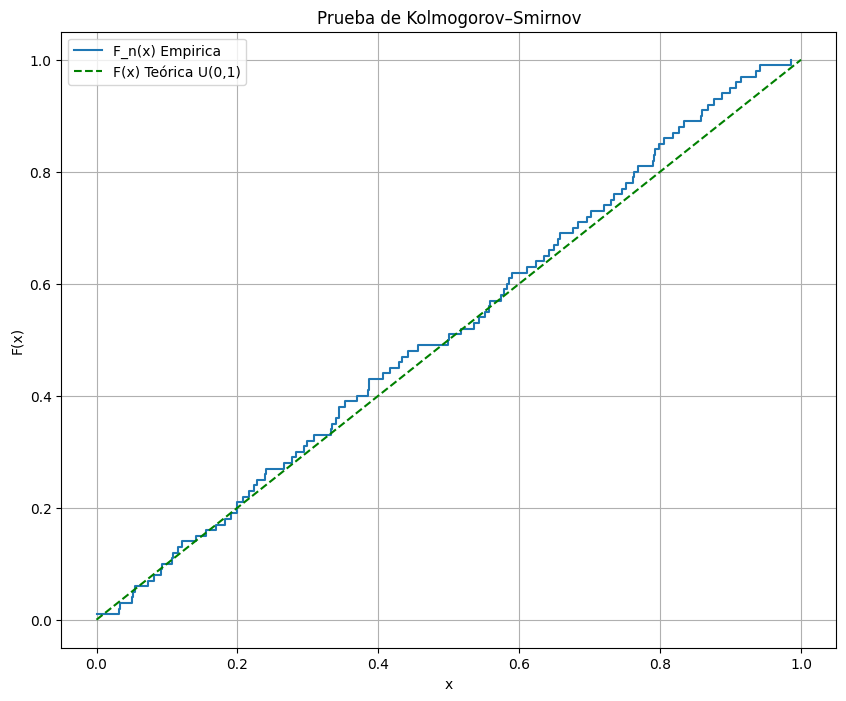

In [155]:
#funcion empririca acumulada
y_empirica = np.arange (1, n+1)/n

#dominio teorico
x_teorico = np.linspace (0,1,200)

plt.figure (figsize= (10,8))

#F_n(x)
plt.step(datos_ordenados, y_empirica, where="post", label= "F_n(x) Empirica")

# F(x) = x
plt.plot (x_teorico, x_teorico, "g--", label="F(x) Teórica U(0,1)")

plt.title("Prueba de Kolmogorov–Smirnov")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

Se observa que la función empírica
$F_n(x)$ es muy cercana
a la función teórica $F(x)=x$.

Además, el estadístico $D_n$ resulta menor que el valor
crítico $D_α$ para $α = 0.05$.

Por lo tanto, no existe evidencia estadística suficiente
para rechazar la hipótesis nula.

Se concluye que los datos son consistentes con una
distribución Uniforme U(0,1).